In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

import matplotlib.pyplot as pyplot
import pickle 
from matplotlib import style

#dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [2]:
data = pd.read_csv("student_dataset/student-mat.csv", sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = data[['G1','G2','G3','studytime','failures','absences']]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [5]:
predict = "G3"

In [6]:
x = np.array(data.drop(columns=predict))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [7]:
# best = 0
# for _ in range(30):
#     x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
#     linear = linear_model.LinearRegression()
#     linear.fit(x_train,y_train)
#     acc = linear.score(x_test,y_test)
#     print(acc)
    
#     if acc > best:
#         best = acc 
#         with open("studentmodel.pickle","wb") as f:
#             pickle.dump(linear,f)
    
pickle_in = open("studentmodel.pickle","rb")
linear = pickle.load(pickle_in)

In [8]:
print("coefficient: ",linear.coef_)

coefficient:  [ 0.1530133   0.98487672 -0.21964501 -0.1890846   0.03434761]


In [9]:
print("intercept: ",linear.intercept_)

intercept:  -1.4996366454994785


In [10]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

-0.8012018486911617 [6 0 1 0 0] 0
12.162272458913378 [12 12  2  0 13] 13
8.455096800561318 [10  9  2  0  0] 9
9.37644367443699 [ 9 10  3  0  9] 9
8.301737991981467 [ 9  9  2  2 11] 9
3.530193086078106 [3 5 2 1 8] 5
11.874805397739083 [14 11  1  0 18] 13
19.953701047660942 [18 19  1  0  6] 19
14.213242111262847 [15 14  2  0  2] 14
13.073288587926205 [13 13  1  0  0] 12
7.813696162569013 [10  8  2  0 10] 8
13.06179272672957 [14 13  3  0  8] 14
-0.40879365520379296 [10  0  2  0  0] 0
13.824960926513343 [13 14  3  0  6] 14
9.869831187349902 [12 10  3  0 10] 12
8.59248723228729 [10  9  2  0  4] 11
10.020780984641446 [12 10  2  0  8] 11
11.906216333458424 [11 12  2  0 10] 13
15.198118828570081 [15 15  2  0  2] 14
9.355655432071066 [ 9 10  2  0  2] 9
13.501082753038624 [14 13  1  0  8] 13
13.95822434950145 [11 14  1  0  6] 14
3.7144521276075846 [6 5 2 1 0] 0
6.012744095399857 [7 7 3 0 6] 7
10.120887136223773 [ 9 11  3  0  2] 11
11.906216333458424 [11 12  2  0 10] 13
15.129423612707097 [15 15 

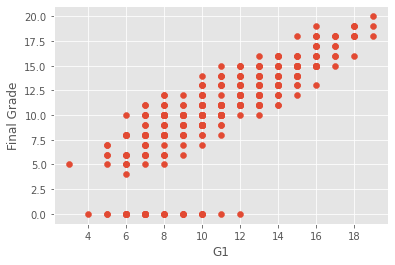

In [11]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()
